Experiment Description. 

The following five salts were chosen:

* CN = Calcium Ammonium Nitrate (ag grade)
* AS = Ammonium sulfate
* MKP = Monopotassium phosphate
* SOP = Potassium sulfate
* MS  = Magnesium sulfate heptahydrate

Using grade A volumetric flasks, five concentrated solutions (250mL each) were prepared with the following weights of the salts:

* CN  = 24.948g
* AS  = 10.048g
* MKP = 9.962g
* SOP = 10.151g
* MS  = 20.076g

Using aliquots from these different concentrated solutions, 50 different diluted, 250mL solutions were prepared, and their conductivity and temperature values were measured. The volume of the aliquots 
(mL) to prepare each solution, plus the conductivity (mS/cm) and temperature (F) readings can be found in the experiments_to_do_conc_results.csv file. The aliquots were drawn using plastic syringes (+/-5%), the solutions were prepared in grade A volumetric flasks.

R2 VALUE OBTAINED = 0.9961544262051623


c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Real Conductivity (mS/cm)')

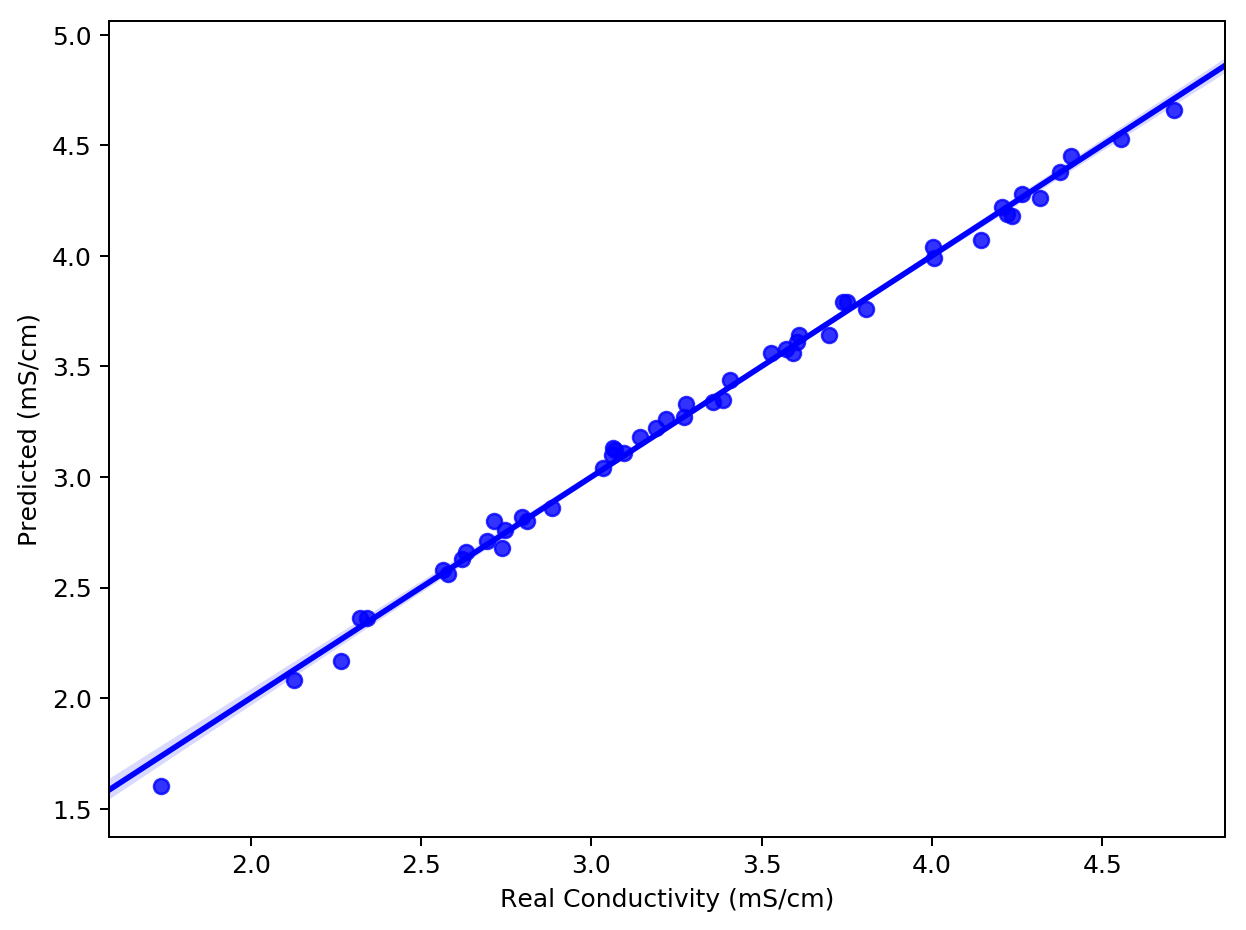

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import *
import matplotlib.pyplot as plt
import seaborn as sns

#load the data for the model, the file contains volume of each concentrated solution used to prepare 250mL test solutions
#it also contains the conductivity value measured in mS/cm for each solution
df = pd.read_csv("experiments_to_do_conc_results.csv")
df0 = df.dropna()

#Concentration of 250mL concentrated solutions that were prepared for each salt
#CN = Calcium Ammonium Nitrate (ag grade)
#AS = Ammonium sulfate
#MKP = Monopotassium phosphate
#SOP = Potassium sulfate
#MS  = Magnesium sulfate heptahydrate

CN_C   = 1000*24.948/250
AS_C   = 1000*10.048/250
MKP_C  = 1000*9.962/250
SOP_C  = 1000*10.151/250
MS_C   = 1000*20.076/250

#data for each one of the samples is converted to total ppm values (mg/L) for all the macronutrients.
df0["Ca"] = 1000*((df0["CN"]*CN_C)/250)*0.19
df0["N_NO3"] = 1000*((df0["CN"]*CN_C)/250)*0.144
df0["N_NH4"] = 1000*(((df0["CN"]*CN_C)/250)*0.011+((df0["AS"]*AS_C)/250)*0.2120)
df0["S"] = 1000*(((df0["AS"]*AS_C)/250)*0.24267+((df0["SOP"]*SOP_C)/250)*0.1840+((df0["MS"]*MS_C)/250)*0.1301)
df0["K"] = 1000*(((df0["MKP"]*MKP_C)/250)*0.28732+((df0["SOP"]*SOP_C)/250)*0.44873)
df0["P"] = 1000*((df0["MKP"]*MKP_C)/250)*0.22758
df0["Mg"] = 1000*((df0["MS"]*MS_C)/250)*0.0986

df0 = df0[["N_NO3", "N_NH4", "Ca", "S", "K", "P", "Mg", "COND"]]
inputs = ["N_NO3", "N_NH4", "Ca", "S", "K", "P", "Mg"]
df0[inputs] = np.round(df0[inputs], 1)
          
#X contains all the ppm values while y contains the conductivity values we want to predict
X = df0.iloc[:,:-1].values
y = df0.iloc[:,-1].values

#We are going to use a simple linear regression model for the prediction
m = LinearRegression()
m.fit(X, y)
print("R2 VALUE OBTAINED = {}".format(m.score(X, y)))

#plot showing all 
plt.figure(figsize=(8, 6), dpi= 180, facecolor='w', edgecolor='k')
sns.regplot(x=m.predict(X), y=y, color="blue")
plt.ylabel("Predicted (mS/cm)")
plt.xlabel("Real Conductivity (mS/cm)")
